In [49]:
###Liberias
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import spacy
from pysentimiento import create_analyzer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Extracción de texto a utilizar 
Para esta parte voy a extraer el texto que voy a utilizar de los tweets.

QUERY = elecciones presidenciales chile 2025 kast jara  lang:es until:2025-11-16 since:2025-11-10 
El query representa los tags y la fecha de los tweets que aparecen en la busqueda  


In [13]:
df = pd.read_csv("tweets-2025-11-19T23_49_51.829Z.csv")
contenido_tweets = df["Tweet Content"]
lista_contenido_tweets = contenido_tweets.tolist()
print(len(lista_contenido_tweets))

110


Ya tenemos una lista con los strings de los 110 tweets extraidos de el query, ahora vamos a limpiar y analizar los strings

Vamos a limpiar cada string de la lista de sus stop words 

In [17]:
stop_words = stopwords.words("spanish") #Genero la lista de las stopwords

In [19]:
nlp = spacy.load("es_core_news_sm") #Cargo español en spacy

In [25]:
lista_sin_stopwords = []
for tweet in lista_contenido_tweets:
    new_tweet = ""
    doc = nlp(tweet)
    lemmas = [token.lemma_.lower() for token in doc] #Tokenizo el tweet en la variable lemmas
    for word in lemmas:
        if word not in stop_words:
            new_tweet += word #Añado cada palabra que no sea un stop word
            new_tweet+= " " #Añao un espacio para saparar las palabras
    lista_sin_stopwords.append(new_tweet) #Lista con los tweets sin los stopwords 

Ahora vamos a analizar el sentimiendo de los tweets

In [26]:
analyzer = create_analyzer(task="sentiment", lang="es") #Creo el analizador

In [41]:
analisis = analyzer.predict(lista_sin_stopwords[1])
final = analisis.output


NEU


In [42]:
#print(lista_sin_stopwords[1])
analisis = analyzer.predict(lista_sin_stopwords[1])
pos = analisis.probas.get("POS")
neu = analisis.probas.get("NEU")
neg = analisis.probas.get("NEG")
#print(neu)

#print(pos)
#print(analyzer.predict(lista_sin_stopwords[1]))
cols = ["tweet_text", "positivo", "negativo", "neutral", "output"]
df_analysis = pd.DataFrame(columns=cols)
df_analysis.head()
#for tweet in lista_sin_stopwords:
#    analisis = analyzer.predict(tweet)
    #print(analisis)
for tweet in lista_sin_stopwords:
    analisis = analyzer.predict(tweet)
    pos = analisis.probas.get("POS")
    neu = analisis.probas.get("NEU")
    neg = analisis.probas.get("NEG")
    output = analisis.output
    new_row = {"tweet_text": tweet, "positivo": pos, "negativo": neg, "neutral": neu, "output": output}
    df_analysis.loc[len(df_analysis)] = new_row

    

In [44]:
df_analysis.sample(5)

,tweet_text,positivo,negativo,neutral,output
14,# análisis | ¿ quién ganar elección chile ...,0.071776,0.160548,0.767676,NEU
83,"elector chileno , comunismo siglo xxi extremo ...",0.034995,0.353940,0.611066,NEU
52,presidenciales chile 2025 \n ¡ ¡ ¡ kast ser pr...,0.141836,0.157467,0.700697,NEU
71,elección presidencial chile : jara kast cerrar...,0.215313,0.306288,0.478399,NEU
60,"haber cambiar panorama , elección seguir ser c...",0.018964,0.731555,0.249481,NEG


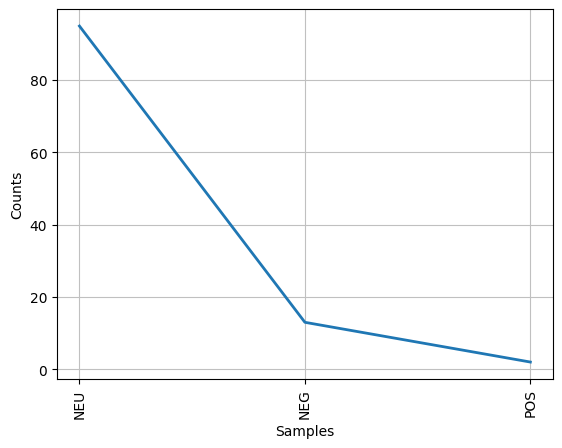

In [46]:
lista_output = df_analysis["output"].tolist()
frecuencia_sentimiento = FreqDist(lista_output)
frecuencia_sentimiento.plot(30, cumulative=False)
plt.show()

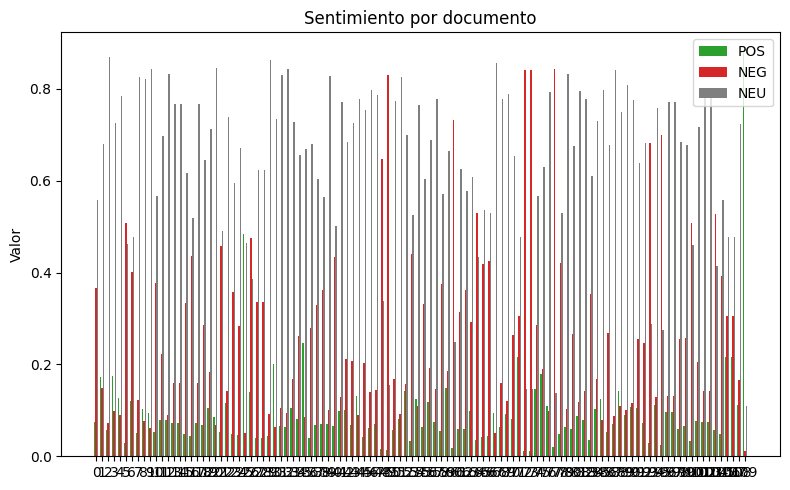

In [52]:
x = np.arange(len(df_analysis.index))
#print(x)
width = 0.25
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x - width, df_analysis["positivo"], width, label="POS", color="tab:green")
ax.bar(x,        df_analysis["negativo"], width, label="NEG", color="tab:red")
ax.bar(x + width,df_analysis["neutral"], width, label="NEU", color="tab:gray")
ax.set_xticks(x)
ax.set_xticklabels(df.index)
ax.set_ylabel("Valor")
ax.set_title("Sentimiento por documento")
ax.legend()
plt.tight_layout()
plt.show()